In [118]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.onetricks.gg/champions/ranking/Evelynn' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr')                                

Here I import, store and request. Then parse the HTML content of the response using BeautifulSoup. Followed by finding the table element that contains the data and extract the data from the table rows.

In [119]:
with open('TopPlayers.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['Character','Role','Tier','Player', 'LP','Play Rate','Games','Win Rate','KDA', 'Region'])

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Evelynn","Assassin", tier, player, lp, playRate, games, winRate, kda, region])

In [120]:
url = 'https://www.onetricks.gg/champions/ranking/Nocturne' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr') 

with open('TopPlayers.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Nocturne", "Assassin", tier, player, lp, playRate, games, winRate, kda, region])

In [121]:
url = 'https://www.onetricks.gg/champions/ranking/Rammus' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr') 

with open('TopPlayers.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Rammus", "Tank", tier, player, lp, playRate, games, winRate, kda, region])

In [122]:
url = 'https://www.onetricks.gg/champions/ranking/Zac' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr') 

with open('TopPlayers.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Zac", "Tank", tier, player, lp, playRate, games, winRate, kda, region])

In [123]:
with open('TopPlayers.csv', 'r') as f:
    reader = csv.reader(f)
    rows = [row for i, row in enumerate(reader) if i not in (1, 31, 50, 80)]

with open('TopPlayers.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(rows)


The code above creates a CVS file "TopPlayer.cvs". During creation the specified columns 'Character','Role','Tier','Player', 'LP','Play Rate','Games','Win Rate','KDA', 'Region'are created by scrapping or by me giving it a column with specific value or by grabbing parts of info from the player column.

In [124]:
df = pd.read_csv('TopPlayers.csv')
df['Win Rate'] = df['Win Rate'].str.replace('%', '').astype(float)
df['Play Rate'] = df['Play Rate'].str.replace('%', '').astype(float)
df['KDA'] = df['KDA'].str.replace(':1', '').astype(float)
df['LP'] = df['LP'].str.replace('LP', '').astype(int)
df['Games'] = df['Games'].astype(int)

Certain columns "Win Rate", "Play Rate", "KDA", "LP", "Games" are cleaned by getting rid of '%', ':1' or 'LP' to help run code further bellow.

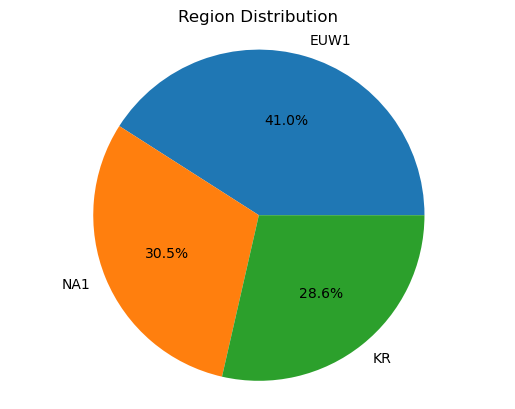

In [125]:
tier_counts = df['Region'].value_counts()
labels = tier_counts.index.tolist()
sizes = tier_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Region Distribution')
plt.axis('equal')
plt.show()

The pie chart above shows the regional distribution of top ranking players. The pie chart shows is that NA1 (North America) and KR (Korea) closely resemble one another, while EUW1 (Europe) is much bigger by +10%. This also means that Europe has more top ranking players. This was somewhat of a shock cause I thought KR would have more initialy.

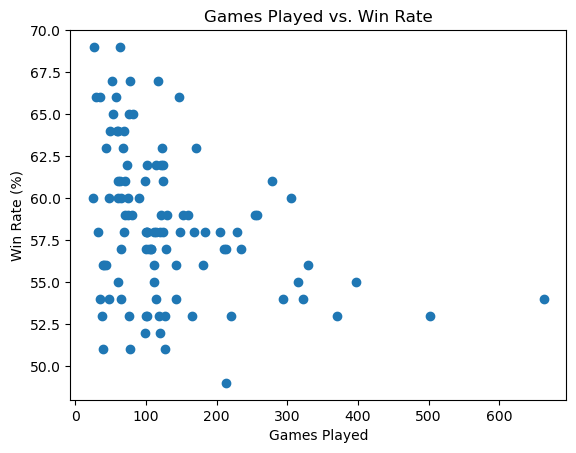

In [126]:
df_sorted = df.sort_values(by=['KDA', 'Win Rate'], ascending=True)

plt.scatter(df_sorted['Games'], df_sorted['Win Rate'])

plt.title('Games Played vs. Win Rate')
plt.xlabel('Games Played')
plt.ylabel('Win Rate (%)')

plt.show()

This is a dot plot of Games Played vs. Win Rate. The dot plot shows that a majority of player's win rate tend to have around 50% ~ 60% win rate as they play more matches.

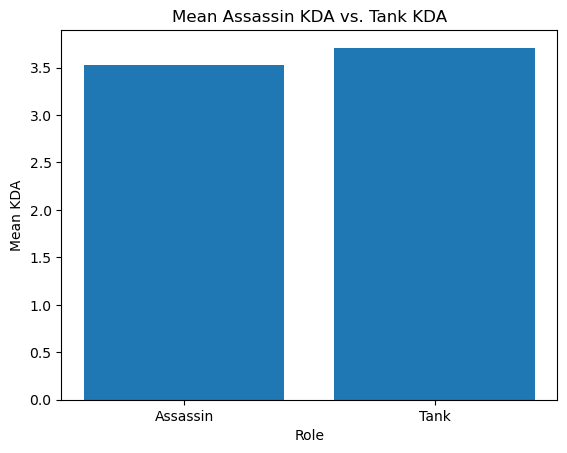

In [127]:
df_filtered = df[df['Role'].isin(['Assassin', 'Tank'])]
df_grouped = df_filtered.groupby('Role').agg({'KDA': 'mean'}).reset_index()

plt.bar(df_grouped['Role'], df_grouped['KDA'])
plt.title('Mean Assassin KDA vs. Tank KDA')
plt.xlabel('Role')
plt.ylabel('Mean KDA')
plt.show()


Here is a bar graph of mean Assassin KDA vs. Tank KDA. This graph is very shocking to me because it show that tanks having a higher KDA than Assassins. In my games as a non top ranking player the assassins generally always have a higher KDA. What this graph tells me is when players reach high ranks the opposite occures with tanks having higher KDA than assassins.

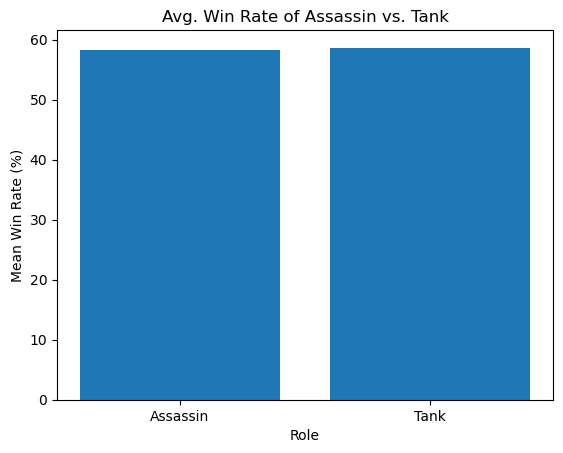

In [128]:
df_filtered = df[df['Role'].isin(['Assassin', 'Tank'])]
df_grouped = df_filtered.groupby('Role').agg({'Win Rate': 'mean'}).reset_index()

plt.bar(df_grouped['Role'], df_grouped['Win Rate'])
plt.title('Avg. Win Rate of Assassin vs. Tank')
plt.xlabel('Role')
plt.ylabel('Mean Win Rate (%)')
plt.show()

This graph shows the average win rate of assassins versus tanks, unexpectedly they have almost similar win rates. After seeing the information provided from the graph above and my understanding of the game favoring Tanks currently. I was surprised to see the win rate be so closely equivalent.

In [129]:
df.to_csv("Top_Players_Final.csv")

Now I save a copie of the non-raw Data as a CSV.